In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Leitura da Matriz de Distâncias

In [4]:
distance_matrix = np.loadtxt('distancia_matrix.csv', delimiter=',')

## Parâmetros do Algoritmo ACO

`num_ants` -> Número de formigas

`num_iterations` -> Máximo de iterações

`alpha` -> Importância do feromônio

`beta` -> Importância da visibilidade (1/distância)

`rho` -> Taxa de evaporação do feromônio

`Q` -> Quantidade de feromônio depositada

In [5]:
num_cities = distance_matrix.shape[0]
num_ants = num_cities
num_iterations = 1000
alpha = 1.0
beta = 5.0
rho = 0.5
Q = 100

## Inicialização

`pheromone`: Matriz de feromônios (inicialmente com 1 em todas as arestas)

`visibility`: Atratividade de cada aresta = `1/distancia`

Armazenamento da melhor rota e da melhor distância global

In [6]:
pheromone = np.ones((num_cities, num_cities))
visibility = 1 / (distance_matrix + np.diag([np.inf]*num_cities))

best_distance = np.inf
best_route = None
best_distances = []
stable_counter = 0

## Loop Principal do ACO

Em cada iteração:

1. Cada formiga constrói uma rota probabilisticamente.
2. Calcula-se o comprimento da rota.
3. Atualiza-se a melhor solução encontrada.
4. Atualiza-se o nível de feromônio nas arestas.
5. Verifica-se se o algoritmo convergiu (100 iterações sem melhora).

In [7]:
for iteration in range(num_iterations):
    all_routes = []
    all_distances = []

    # === Cada formiga constrói uma rota ===
    for ant in range(num_ants):
        route = [random.randint(0, num_cities-1)]
        while len(route) < num_cities:
            i = route[-1]
            allowed = list(set(range(num_cities)) - set(route))
            probs = []
            for j in allowed:
                tau = pheromone[i][j] ** alpha
                eta = visibility[i][j] ** beta
                probs.append(tau * eta)
            probs = np.array(probs) / np.sum(probs)
            next_city = random.choices(allowed, weights=probs, k=1)[0]
            route.append(next_city)
        all_routes.append(route)

        # Distância total do percurso
        distance = sum(distance_matrix[route[i], route[i+1]] for i in range(num_cities-1))
        distance += distance_matrix[route[-1], route[0]]  # volta à cidade inicial
        all_distances.append(distance)

    # === Atualização do melhor caminho ===
    min_distance = np.min(all_distances)
    if min_distance < best_distance:
        best_distance = min_distance
        best_route = all_routes[np.argmin(all_distances)]
        stable_counter = 0
    else:
        stable_counter += 1

    best_distances.append(best_distance)

    # === Atualização dos feromônios ===
    pheromone *= (1 - rho)
    for r, d in zip(all_routes, all_distances):
        for i in range(num_cities - 1):
            pheromone[r[i]][r[i+1]] += Q / d
        pheromone[r[-1]][r[0]] += Q / d  # volta ao início

    # === Critério de convergência ===
    if stable_counter >= 100:
        print(f"✅ Convergiu na iteração {iteration}")
        break

✅ Convergiu na iteração 100


## Resultados Finais

In [8]:
print("\nMelhor rota encontrada:")
print(best_route)
print(f"Menor distância: {best_distance:.2f}")


Melhor rota encontrada:
[8, 10, 4, 16, 14, 18, 7, 17, 3, 15, 0, 1, 13, 6, 2, 12, 19, 11, 5, 9]
Menor distância: 1329.00


## Gráfico da Melhor Distância por Iteração

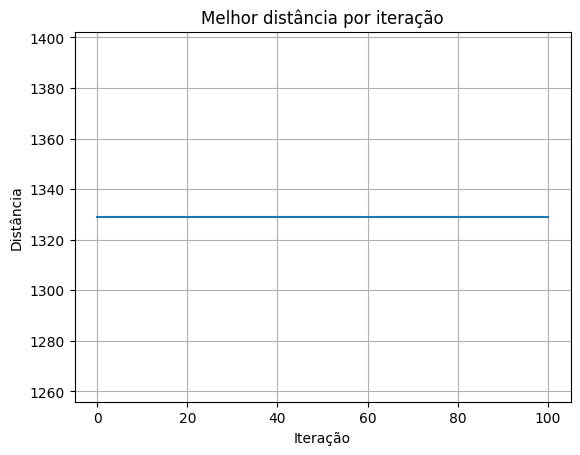

In [9]:
plt.plot(best_distances)
plt.title("Melhor distância por iteração")
plt.xlabel("Iteração")
plt.ylabel("Distância")
plt.grid(True)
plt.show()